# Análisis de datos bibliográficos de la revista Dyna-Colombia

Este notebook contiene el código necesario para la generación de la página estática con información sobre las publicaciones sobre la revista Dyna que aparecen en Scopus. En este notebook se obtendrán los 10 artículos más citados y la cantidad de publicaciones por año. Los archivos usados para la generación del sitio web están en la carpeta `docs`.

In [1]:
##
## Preparación
##
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

## Adquisición de datos

La adquisición de la información debería realizarse directamente consultado Scopus via API, pero no se disponen de las credenciales de seguridad para ello. Por esto, se asume que la descarga se realiza manualmente y se guarda en el archivo `data/scopus.csv`.

## Lectura de datos

In [2]:
## Se lee el archivo de datos
df = pd.read_csv('data/scopus.csv')

## se imprimen los nombres de las columnas para verificar
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Document Type', 'Publication Stage', 'Access Type',
       'Source', 'EID'],
      dtype='object')

## Articulos más citados

In [3]:
##
## La columna 'Cited by' tiene registros con NaN. Estos valores se 
## convierten a 0
##
df['Cited by'] = df['Cited by'].map(lambda x: 0 if np.isnan(x) else x)

In [4]:
##
## Se ordena por las citas y luego se extraen los campos de interés.
##
most_cited = (df.sort_values(by=['Cited by'], ascending=False))[['Authors', 'Title', 'Year', 'Cited by']]

##
## Se limita el DataFrame a los 10 primeros registros.
##
most_cited = most_cited[0:10]

##
## Se construye una lista de strings con la información
## bibliográfica de interés
##
table = []
for a,b,c,d in most_cited.values.tolist():
    table += [a + b + ';' + str(c) + ',' + str(int(d))]
most_cited = table

##
## Se imprimen para verificar
##
most_cited

['Ayala, G., Agudelo, A., Vargas, R.Effect of glycerol on the electrical properties and phase behavior of cassava starch biopolymers [Efecto del glicerol sobre las propiedades eléctricas y comportamiento de fase en biopolímeros de almidón de yuca];2012,27',
 'Cabral, P., Zamyatin, A.Markov processes in modeling land use and land cover changes in Sintra-Cascais, Portugal [Procesos de markov en la modelización de alteraciones del uso e ocupación del suelo en Sintra-Cascais, Portugal];2009,24',
 'Rojas, D., Cipriano, A.Model based predictive control of a rougher flotation circuit considering grade estimation in intermediate cells [Control predictivo de un circuito de flotación rougher considerando estimación de leyes en celdas intermedias];2011,22',
 'Alcocer, W., Vela, L., Blanco, A., Gonzalez, J., Oliver, M.Major trends in the development of ankle rehabilitation devices [Principales tendencias en el desarrollo de dispositivos de rehabilitacion para tobillo];2012,21',
 'Parra, E.R., Aran

## Artículos por año

In [5]:
##
## Se cuenta la cantidad de artículos realizando una
## agregación por el año
##
count = df.groupby('Year')['Authors'].agg(['count'])
count

,count
Year,
2008,67
2009,106
2010,112
2011,143
2012,164
2013,131
2014,197
2015,184
2016,151


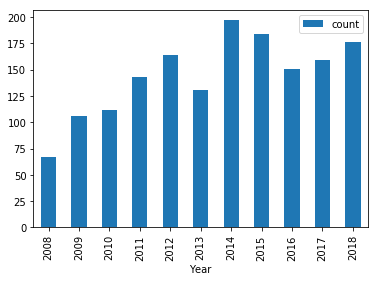

In [6]:
##
## Se genera el gráfico y se salva en la carpeta docs
##
count.plot.bar();
plt.savefig('docs/numbyyear.png')

## Generación de la página web

Para genera la página web, se usa el módulo `jinja2`, usando el archivo `templates/index.html` como plantilla.

In [7]:
!cat templates/index.html

<!DOCTYPE html>
<html>
<head>
   <title>Ejemplo de un Dashboard</title>
</head>
<body>

    <h1>Analisis de las publicaciones de la revista Dyna-Colombia</h1>

    <p>Esta es una demostaacion de la creacion de un Dashboard estatico en GitHub Pages</p>

    <h2>Cantidad de articulos publicados por ano</h2>
  
    <img src="numbyyear.png">
    

    <h2>Articulos mas citados</h2>

    <ul>
        {% for i in articles %}
        <li> {{ i }} </li>
        {% endfor %}
    </ul>



</body>
</html>

En la plantilla, el código:


     <ul>
         {% for i in articles %}
         <li> {{ i }} </li>
         {% endfor %}
     </ul>
    
genera una lista de viñetas mediante un ciclo `for` donde cada elemento es uno de los 10 artículos más citados. La generación de la página (`docs/index.html`) se genera con el siguiente código 

In [9]:
from jinja2 import Template

##
## Carga el template almacenado como una cadena de texto
##
template = Template(open('templates/index.html', 'rt').read())

##
## Genera el archivo index.html pasando en la variable articles 
## de la plantilla, el conteido de la variable most_cited
##
open("docs/index.html","w").write( template.render(articles = most_cited))

3223

## Publicación de la página web

Al actualizar el repo en GitHub se actualiza el sitio web automáticamente.

---